In [48]:
import pandas as pd
import numpy as np
df=pd.read_csv('dataset.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [49]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [50]:
df.shape

(112634, 17)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [52]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

In [53]:
df['Model'].fillna('Unknown', inplace=True)

In [54]:
df['Legislative District'].fillna(-1, inplace=True)

In [55]:
df['Vehicle Location'].fillna('Unknown', inplace=True)
# Optional: Drop rows
# df.dropna(subset=['Vehicle Location'], inplace=True)


In [56]:
df['Electric Utility'].fillna('Unknown Utility', inplace=True)


In [57]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [58]:
# 1. Univariate Analysis

In [59]:
# 1.1 Numerical Columns
import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
print(df[['Model Year', 'Electric Range', 'Base MSRP']].describe())

          Model Year  Electric Range      Base MSRP
count  112634.000000   112634.000000  112634.000000
mean     2019.003365       87.812987    1793.439681
std         2.892364      102.334216   10783.753486
min      1997.000000        0.000000       0.000000
25%      2017.000000        0.000000       0.000000
50%      2020.000000       32.000000       0.000000
75%      2022.000000      208.000000       0.000000
max      2023.000000      337.000000  845000.000000


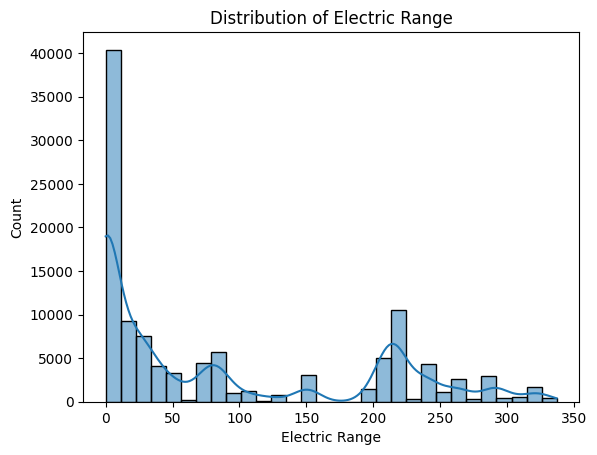

In [61]:
sns.histplot(df['Electric Range'], bins=30, kde=True)
plt.title('Distribution of Electric Range')
plt.show()


C:\Users\avi\AppData\Local\Temp\ipykernel_6324\1636389437.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




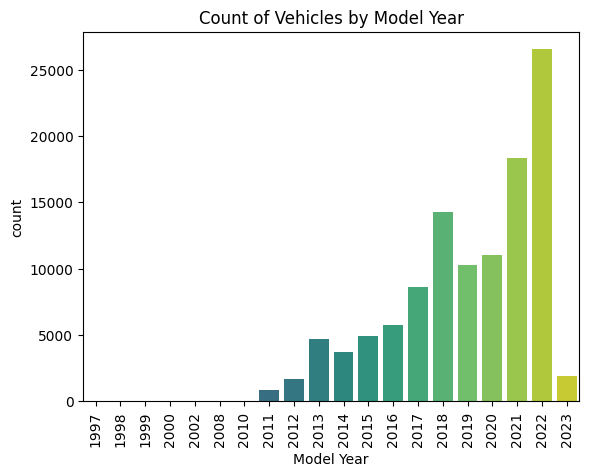

In [62]:
sns.countplot(x='Model Year', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Vehicles by Model Year')
plt.show()


In [63]:
# 1.2 Categorical Columns

C:\Users\avi\AppData\Local\Temp\ipykernel_6324\3984120204.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




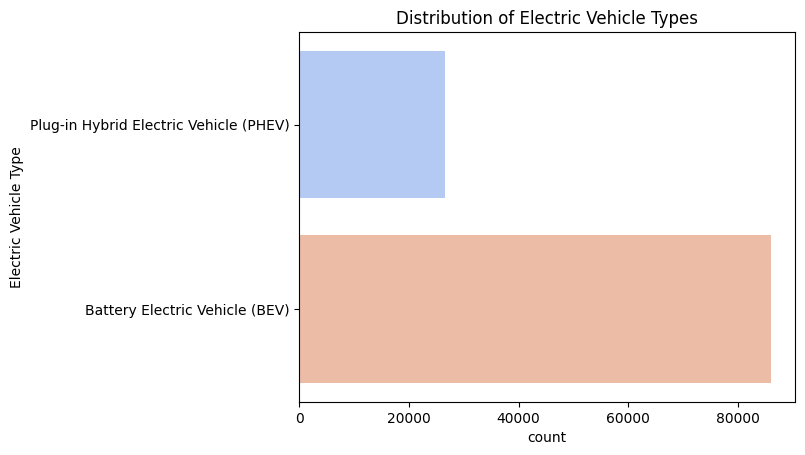

In [64]:
sns.countplot(y='Electric Vehicle Type', data=df, palette='coolwarm')
plt.title('Distribution of Electric Vehicle Types')
plt.show()

C:\Users\avi\AppData\Local\Temp\ipykernel_6324\3836617921.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




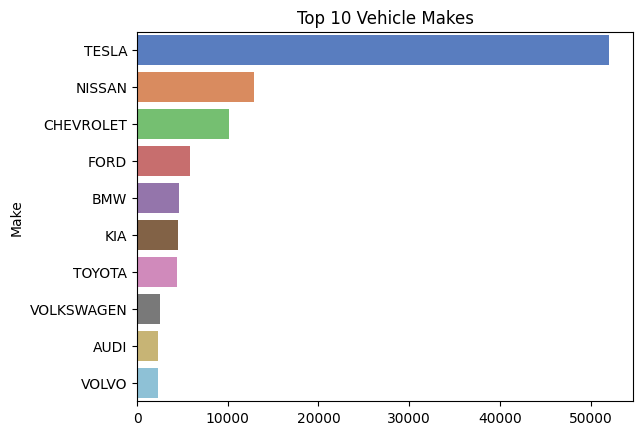

In [65]:
top_makes = df['Make'].value_counts().nlargest(10)
sns.barplot(y=top_makes.index, x=top_makes.values, palette='muted')
plt.title('Top 10 Vehicle Makes')
plt.show()

In [66]:
# 2. Bivariate Analysis

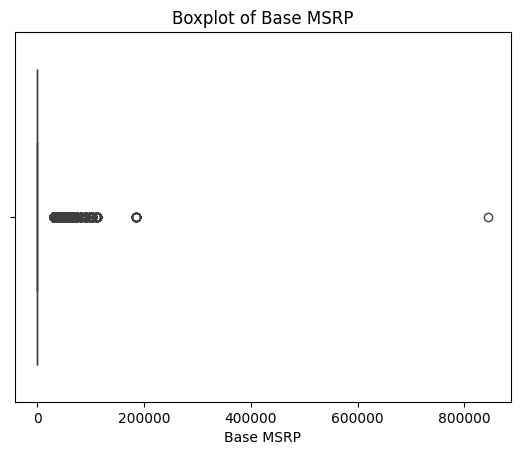

Number of outliers: 1
          Make Model  Base MSRP
62533  PORSCHE   918     845000


In [67]:
# Boxplot to visualize outliers in Base MSRP
sns.boxplot(x=df['Base MSRP'])
plt.title('Boxplot of Base MSRP')
plt.show()

# Identifying records with Base MSRP > 400,000
outliers = df[df['Base MSRP'] > 400000]
print(f"Number of outliers: {len(outliers)}")
print(outliers[['Make', 'Model', 'Base MSRP']])

Updated size of df: 112633


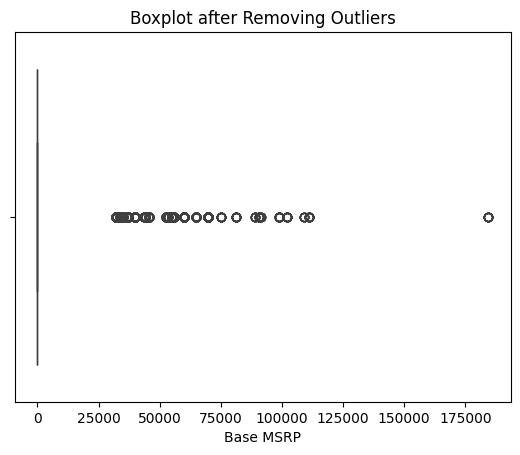

In [68]:
# Remove rows with Base MSRP > 400,000
df = df[df['Base MSRP'] <= 400000]
# Verify the new dataset size
print(f"Updated size of df: {df.shape[0]}")

# Plot a boxplot to confirm outliers are removed
sns.boxplot(x=df['Base MSRP'])
plt.title('Boxplot after Removing Outliers')
plt.show()

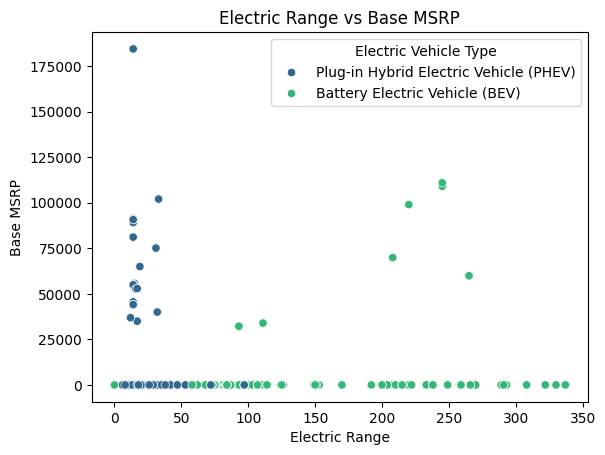

In [69]:
sns.scatterplot(x='Electric Range', y='Base MSRP', hue='Electric Vehicle Type', data=df, palette='viridis')
plt.title('Electric Range vs Base MSRP')
plt.show()

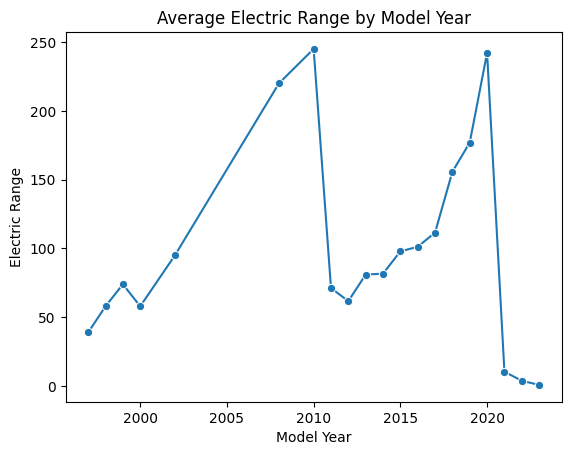

In [70]:
df_year_range = df.groupby('Model Year')['Electric Range'].mean().reset_index()
sns.lineplot(x='Model Year', y='Electric Range', data=df_year_range, marker='o')
plt.title('Average Electric Range by Model Year')
plt.show()

C:\Users\avi\AppData\Local\Temp\ipykernel_6324\3994696590.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




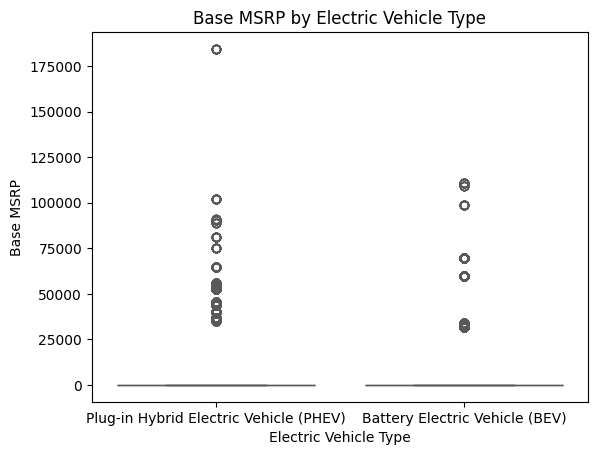

In [71]:
sns.boxplot(x='Electric Vehicle Type', y='Base MSRP', data=df, palette='Set2')
plt.title('Base MSRP by Electric Vehicle Type')
plt.show()

In [72]:
#Choropleth animation

In [73]:
import plotly.express as px

In [74]:
# Step 1: Aggregate the number of electric vehicles by state
ev_counts = df.groupby('State').size().reset_index(name='EV Count')

In [75]:
# Step 2: Create a Choropleth Map
fig = px.choropleth(
    ev_counts,
    locations='State',  # Use the 'State' column for locations
    locationmode='USA-states',  # Set the location mode to USA states
    color='EV Count',  # Set the color based on the count of EVs
    color_continuous_scale='Viridis',  # Choose a color scale
    labels={'EV Count': 'Number of Electric Vehicles'},  # Set labels for the legend
    title='Number of Electric Vehicles by State',  # Set the title
)


In [76]:
# Update layout to fit the map properly
fig.update_geos(fitbounds="locations", visible=True)
fig.show()

In [77]:
import bar_chart_race as bcr
final = df.groupby(['Model Year', 'Make']).size().unstack(fill_value=0)


In [78]:
bcr.bar_chart_race(
    # must be a DataFrame where each row represents a single period of time.
    df=final,


    # name of the output video file
    filename="final.mp4",


    # specify location of image folder
    #img_label_folder="bar_image_labels",


    # change the Figure properties
    fig_kwargs={
        'figsize': (26, 15),
        'dpi': 120,
        'facecolor': '#F8FAFF'
    },


    # orientation of the bar: h or v
    orientation="h",


    # sort the bar for each period
    sort="desc",


    # number of bars to display in each frame
    n_bars=10,


    # to fix the maximum value of the axis
    # fixed_max=True,


    # smoothness of the animation
    steps_per_period=45,


    # time period in ms for each row
    period_length=3000,

    # custom set of colors
    colors=[
        '#6ECBCE', '#FF2243', '#FFC33D', '#CE9673', '#FFA0FF', '#6501E5', '#F79522', '#699AF8', '#34718E', '#00DBCD',
        '#00A3FF', '#F8A737', '#56BD5B', '#D40CE5', '#6936F9', '#FF317B', '#0000F3', '#FFA0A0', '#31FF83', '#0556F3'
    ],
    # title and its styles
    title={'label': 'Year wise sales of each Makers from last decade',
           'size': 52,
           'weight': 'bold',
           'pad': 40
           },


    # adjust the position and style of the period label
    period_label={'x': .95, 'y': .15,
                  'ha': 'right',
                  'va': 'center',
                  'size': 72,
                  'weight': 'semibold'
                  },


    # style the bar label text
    bar_label_font={'size': 27},


    # style the labels in x and y axis
    tick_label_font={'size': 27},


    # adjust the style of bar
    # alpha is opacity of bar
    # ls - width of edge
    bar_kwargs={'alpha': .99, 'lw': 0},


    # adjust the bar label format
    bar_texttemplate='{x:.2f}',


    # adjust the period label format
    period_template='{x:.0f}',
)


TypeError: bar_chart_race() got an unexpected keyword argument 'fig_kwargs'

In [ ]:
final = df.groupby(['Model Year', 'Make']).size().unstack(fill_value=0)

# Step 3: Create the Racing Bar Plot
bcr.bar_chart_race(
    df=final,  # Your DataFrame
    filename="final.mp4",  # Output video file name

    # Title and its styles
    title={'label': 'Year-wise Sales of Each Maker from Last Decade',  # Title
           'size': 52,  # Title size
           'weight': 'bold',  # Title weight
           'pad': 40  # Padding around the title
           },

    # Adjust the position and style of the period label
    period_label={'x': .95, 'y': .15,
                  'ha': 'right',  # Horizontal alignment
                  'va': 'center',  # Vertical alignment
                  'size': 72,  # Size of the period label
                  'weight': 'semibold'  # Weight of the period label
                  },

    # Adjust the style of the bars
    bar_kwargs={'alpha': .99, 'lw': 0},  # Opacity and line width

    # Additional parameters
    orientation="h",  # Horizontal bar chart
    sort="desc",  # Sort bars in descending order
    n_bars=10,  # Number of bars to display
    steps_per_period=45,  # Smoothness of the animation
    period_length=3000,  # Time for each period in ms
)

C:\Users\avi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\bar_chart_race\_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\avi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\bar_chart_race\_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\avi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\bar_chart_race\_make_chart.py:226: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`

MovieWriter ffmpeg unavailable; using Pillow instead.


In [47]:
bcr.bar_chart_race(
    df=final,  # Your DataFrame
    filename="final.mp4",  # Output video file name

    # Title and its styles
    title={'label': 'Year-wise Sales of Each Maker from Last Decade',  # Title
           'size': 52,  # Title size
           'weight': 'bold',  # Title weight
           'pad': 40  # Padding around the title
           },

    # Adjust the position and style of the period label
    period_label={'x': .95, 'y': .15,
                  'ha': 'right',  # Horizontal alignment
                  'va': 'center',  # Vertical alignment
                  'size': 72,  # Size of the period label
                  'weight': 'semibold'  # Weight of the period label
                  },

    # Adjust the style of the bars
    bar_kwargs={'alpha': .99, 'lw': 0},  # Opacity and line width

    # Additional parameters
    orientation="h",  # Horizontal bar chart
    sort="desc",  # Sort bars in descending order
    n_bars=10,  # Number of bars to display
    steps_per_period=45,  # Smoothness of the animation
    period_length=3000,  # Time for each period in ms
)

C:\Users\avi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\bar_chart_race\_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\avi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\bar_chart_race\_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\avi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\bar_chart_race\_make_chart.py:226: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`

MovieWriter ffmpeg unavailable; using Pillow instead.


Exception: You do not have ffmpeg installed on your machine. Download
                            ffmpeg from here: https://www.ffmpeg.org/download.html.
                            
                            Matplotlib's original error message below:

                            unknown file extension: .mp4
                            